In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Prajna/Desktop/App_Synergy/data_1.csv')

In [3]:
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age
0,Freelance entrepreneur. Hardcore bacon guru. S...,0,8,1,5,4,9,9,0,16
1,Evil zombie fanatic. Award-winning social medi...,6,5,4,5,2,1,2,1,28
2,Friendly twitter trailblazer. Pop cultureaholi...,6,5,5,1,5,5,8,1,33
3,Freelance music practitioner. Typical travel e...,4,0,3,4,9,6,7,0,28


In [4]:
df_new = df.iloc[:,1:10]

In [5]:
df_new.head()

,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age
0,0,8,1,5,4,9,9,0,16
1,6,5,4,5,2,1,2,1,28
2,6,5,5,1,5,5,8,1,33
3,4,0,3,4,9,6,7,0,28


In [6]:
# Standardization
from sklearn.preprocessing import StandardScaler

a = StandardScaler()
a.fit(df_new)
df_standardized = a.transform(df_new)
df_std = pd.DataFrame(df_standardized)
df_std.describe()

,0,1,2,3,4,5,6,7,8
count,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,-5.551115e-17,-1.387779e-17,-1.387779e-17,0.000000,1.387779e-17,-2.775558e-17,0.000000,1.387779e-17
std,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.632993,-1.566699e+00,-1.521278e+00,-1.677484e+00,-1.176697,-1.485297e+00,-1.671258e+00,-1.000000,-1.637382e+00
25%,-0.408248,-2.611165e-01,-5.070926e-01,-3.049971e-01,-0.588348,-4.368520e-01,-2.785430e-01,-1.000000,-1.996808e-01
50%,0.408248,1.740777e-01,1.690309e-01,4.574957e-01,-0.196116,8.737041e-02,3.713907e-01,0.000000,2.795531e-01
75%,0.816497,4.351941e-01,6.761234e-01,7.624929e-01,0.392232,5.242224e-01,6.499337e-01,1.000000,4.792338e-01
max,0.816497,1.218544e+00,1.183216e+00,7.624929e-01,1.568929,1.310556e+00,9.284767e-01,1.000000,1.078276e+00


In [7]:
df_std.head()

,0,1,2,3,4,5,6,7,8
0,-1.632993,1.218544,-1.521278,0.762493,-0.392232,1.310556,0.928477,-1.0,-1.637382
1,0.816497,0.174078,0.507093,0.762493,-1.176697,-1.485297,-1.671258,1.0,0.279553
2,0.816497,0.174078,1.183216,-1.677484,0.000000,-0.087370,0.557086,1.0,1.078276
3,0.000000,-1.566699,-0.169031,0.152499,1.568929,0.262111,0.185695,-1.0,0.279553


In [8]:
df_std.shape

(4, 9)

In [9]:
df_bios = df.iloc[:,0:1]
df_bios.head()

,Bios
0,Freelance entrepreneur. Hardcore bacon guru. S...
1,Evil zombie fanatic. Award-winning social medi...
2,Friendly twitter trailblazer. Pop cultureaholi...
3,Freelance music practitioner. Typical travel e...


In [10]:
# NLP
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(df_bios)):
  review = re.sub('[^a-zA-Z]', ' ', df_bios['Bios'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()  
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus[1]

'evil zombi fanat award win social media scholar web evangelist alcohol buff food nerd avid beer maven writer'

In [12]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
df_bios_new = cv.fit_transform(corpus).toarray()

In [13]:
df_bios_new.shape

(4, 44)

In [14]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(df_bios_new, columns=cv.get_feature_names())
df_wrds

,advoc,alcohol,anim,avid,award,bacon,beer,buff,charm,cultureahol,...,trailblaz,travel,troublemak,tv,twitter,typic,web,win,writer,zombi
0,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,1,0,0,0,0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0


In [15]:
X = pd.concat([df_std, df_wrds], axis=1)
X

,0,1,2,3,4,5,6,7,8,advoc,...,trailblaz,travel,troublemak,tv,twitter,typic,web,win,writer,zombi
0,-1.632993,1.218544,-1.521278,0.762493,-0.392232,1.310556,0.928477,-1.0,-1.637382,1,...,0,0,0,1,0,0,0,0,0,1
1,0.816497,0.174078,0.507093,0.762493,-1.176697,-1.485297,-1.671258,1.0,0.279553,0,...,0,0,0,0,0,0,1,1,1,1
2,0.816497,0.174078,1.183216,-1.677484,0.000000,-0.087370,0.557086,1.0,1.078276,0,...,1,1,0,0,1,0,0,0,0,0
3,0.000000,-1.566699,-0.169031,0.152499,1.568929,0.262111,0.185695,-1.0,0.279553,0,...,1,1,1,0,0,1,0,0,0,0


# Implementing K-Means++
# Using the elbow method to find the optimal number of clusters

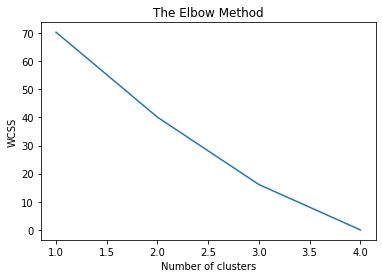

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

#y_kmeans = kmeans.fit_predict(X)

In [18]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    3
0    1
Name: cluster, dtype: int64

In [19]:
pred

array([0, 1, 1, 1], dtype=int32)

In [20]:
df['NEW_COLUMN'] = pd.Series(pred, index=df.index)

In [21]:
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age,NEW_COLUMN
0,Freelance entrepreneur. Hardcore bacon guru. S...,0,8,1,5,4,9,9,0,16,0
1,Evil zombie fanatic. Award-winning social medi...,6,5,4,5,2,1,2,1,28,1
2,Friendly twitter trailblazer. Pop cultureaholi...,6,5,5,1,5,5,8,1,33,1
3,Freelance music practitioner. Typical travel e...,4,0,3,4,9,6,7,0,28,1
